In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, median_absolute_error, r2_score


In [ ]:
df = pd.read_excel("df_ndvi.xlsx")
quantitive_features = pd.read_excel('Колич_признаки_КСИ_СибНИИРС_2023_2024_г_.xlsx', sheet_name='2024', skiprows=2)
quantitive_features = quantitive_features.iloc[:37]

In [4]:
quantitive_features = quantitive_features.astype({'Номер сорта': int})

In [26]:
df

,plot_id,mean_ndvi,genotype,target
0,1,0.278411,1,1.90
1,2,0.292651,2,2.24
2,3,0.331634,3,2.50
3,4,0.328296,4,2.45
4,5,0.313839,5,2.76
...,...,...,...,...
143,144,0.276801,22,2.85
144,145,0.271906,21,2.11
145,146,0.263052,20,2.60
146,147,0.282051,19,2.44


In [27]:
X, y = df[['genotype', 'mean_ndvi']], df['target']

In [33]:
X_train, X_test = X.iloc[: 111], X.iloc[111:]
y_train, y_test = y.iloc[: 111], y.iloc[111:]

In [35]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [44]:
y_pred = lr.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
mae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [45]:
print(rmse, mae, r2)

0.3137038069841494 0.1926642840361854 -0.01185928577455031


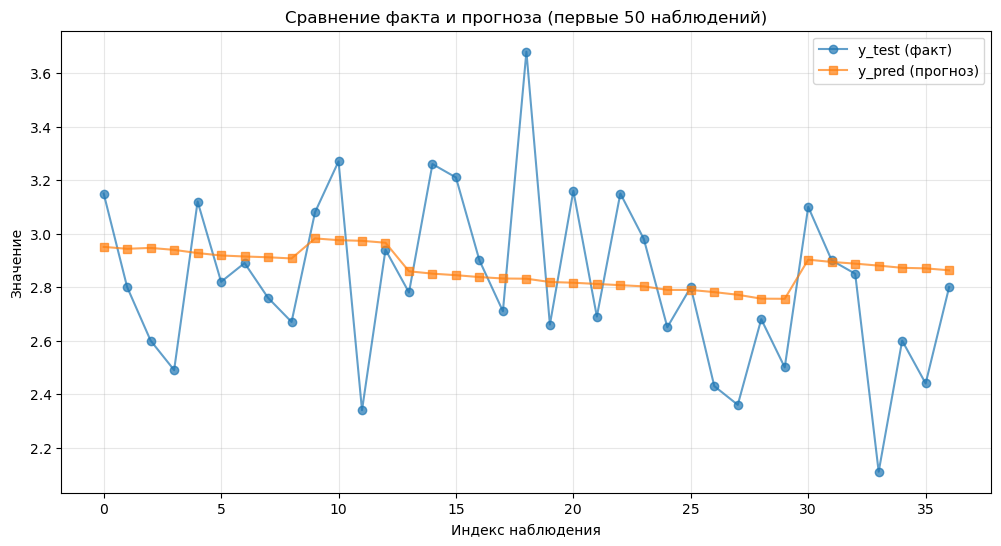

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:50], label='y_test (факт)', marker='o', alpha=0.7)
plt.plot(y_pred[:50], label='y_pred (прогноз)', marker='s', alpha=0.7)
plt.xlabel('Индекс наблюдения')
plt.ylabel('Значение')
plt.title('Сравнение факта и прогноза (первые 50 наблюдений)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()